In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
def display_image(image, title="Image", cmap=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

Original Lena Image:


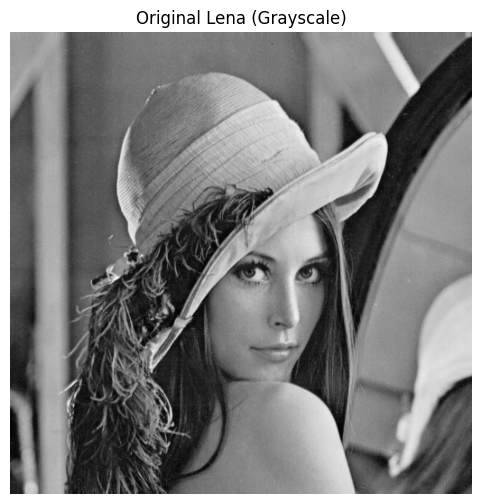

Image dimensions: 512x512


In [ ]:
lena_path = 'lena512.bmp'
original_image = cv2.imread(lena_path, cv2.IMREAD_GRAYSCALE)

if original_image is None:
    print(f"Error: Could not load image from {lena_path}")
else:
    print("Original Lena Image:")
    display_image(original_image, title="Original Lena (Grayscale)", cmap='gray')
    img_height, img_width = original_image.shape
    print(f"Image dimensions: {img_width}x{img_height}")

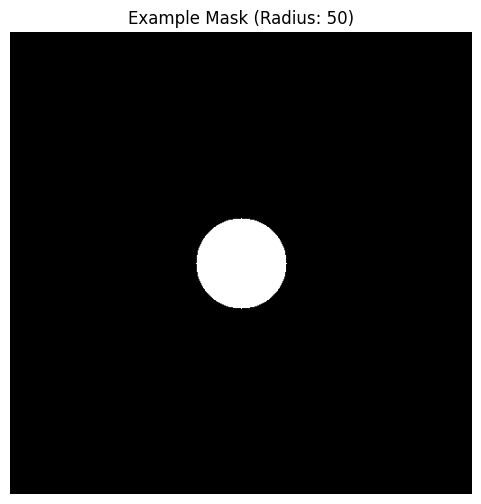

In [7]:
def create_circular_mask(h, w, center_x, center_y, radius):
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center_x)**2 + (Y - center_y)**2)
    mask = dist_from_center <= radius
    return mask.astype(float) 

if original_image is not None:
    rows, cols = original_image.shape
    center_x, center_y = cols // 2, rows // 2
    example_radius = 50
    example_mask = create_circular_mask(rows, cols, center_x, center_y, example_radius)
    display_image(example_mask, title=f"Example Mask (Radius: {example_radius})", cmap='gray')

In [8]:
def calculate_psnr(img1, img2):
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)

    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')  
    
    max_pixel_value = 255.0 
    psnr = 20 * math.log10(max_pixel_value / math.sqrt(mse))
    return psnr

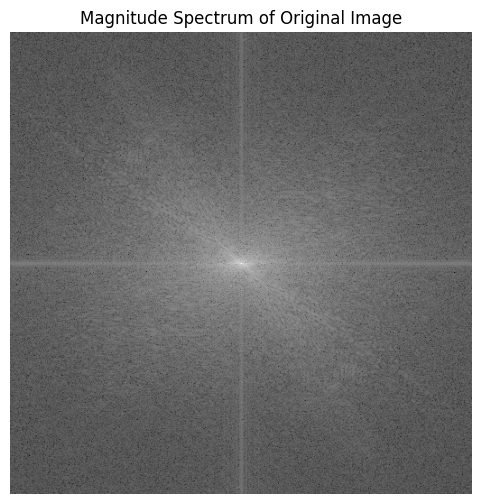


--- Processing with different mask radii ---

Stage 1: Processing with radius = 20


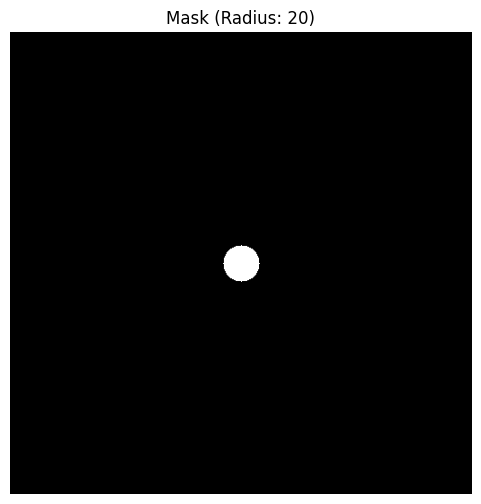

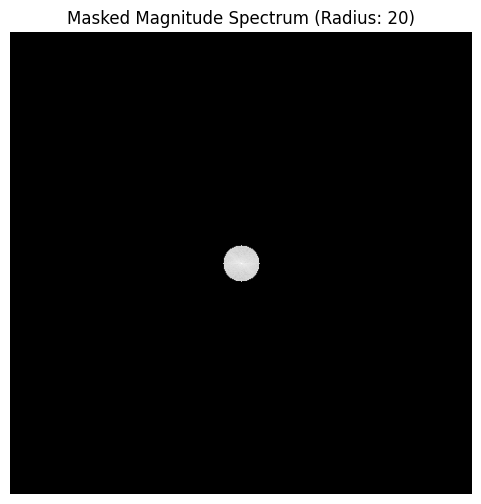

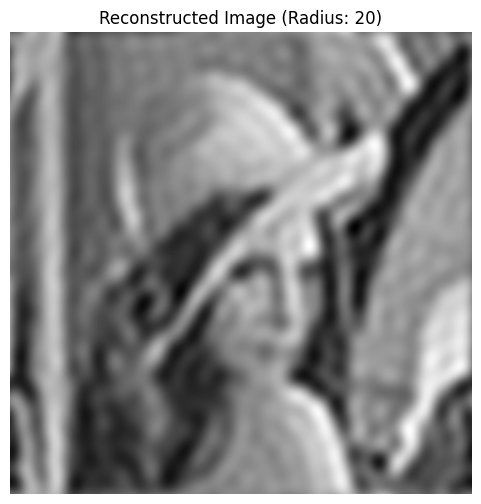

PSNR between original and reconstructed (Radius 20): 22.82 dB

Stage 2: Processing with radius = 60


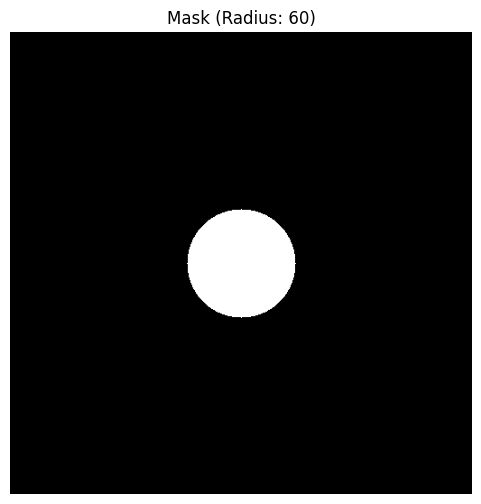

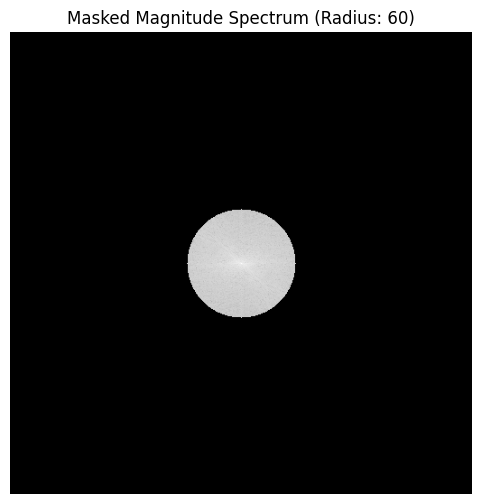

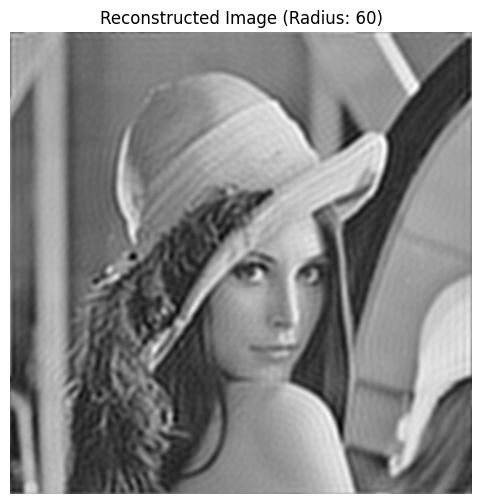

PSNR between original and reconstructed (Radius 60): 28.38 dB

Stage 3: Processing with radius = 120


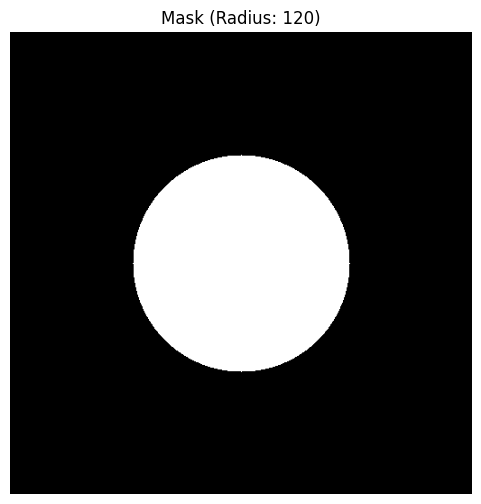

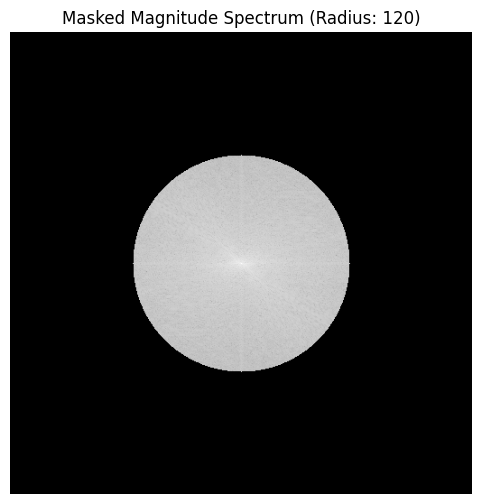

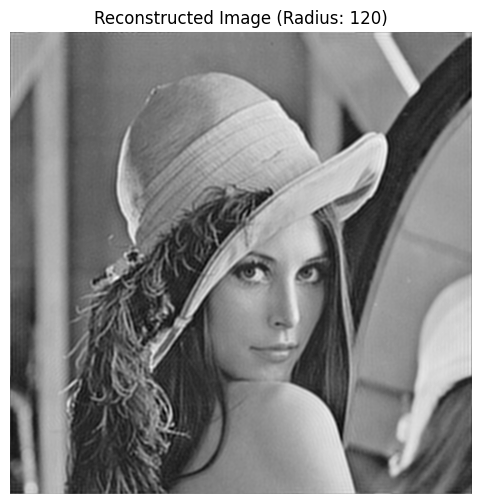

PSNR between original and reconstructed (Radius 120): 33.73 dB


In [ ]:
if original_image is not None:
    f_transform = np.fft.fft2(original_image)
    f_transform_shifted = np.fft.fftshift(f_transform) 
    
    magnitude_spectrum_original = 20 * np.log(np.abs(f_transform_shifted) + 1e-9) 
    display_image(magnitude_spectrum_original, title="Magnitude Spectrum of Original Image", cmap='gray')

    radii = [20, 60, 120] 
    
    results = []

    print("\n--- Processing with different mask radii ---")
    for i, radius in enumerate(radii):
        print(f"\nStage {i+1}: Processing with radius = {radius}")

        rows, cols = original_image.shape
        center_x, center_y = cols // 2, rows // 2
        mask = create_circular_mask(rows, cols, center_x, center_y, radius)
        
        display_image(mask, title=f"Mask (Radius: {radius})", cmap='gray')

        f_transform_shifted_masked = f_transform_shifted * mask
        
        magnitude_spectrum_masked = 20 * np.log(np.abs(f_transform_shifted_masked) + 1e-9)
        display_image(magnitude_spectrum_masked, title=f"Masked Magnitude Spectrum (Radius: {radius})", cmap='gray')

        f_ishift = np.fft.ifftshift(f_transform_shifted_masked)
        img_reconstructed = np.fft.ifft2(f_ishift)
        img_reconstructed = np.abs(img_reconstructed) 
        
        img_reconstructed_display = np.clip(img_reconstructed, 0, 255).astype(np.uint8)

        display_image(img_reconstructed_display, title=f"Reconstructed Image (Radius: {radius})", cmap='gray')

        psnr_value = calculate_psnr(original_image, img_reconstructed_display) 
        print(f"PSNR between original and reconstructed (Radius {radius}): {psnr_value:.2f} dB")
        
        results.append({
            'radius': radius,
            'reconstructed_image': img_reconstructed_display,
            'psnr': psnr_value,
            'mask': mask,
            'masked_spectrum': magnitude_spectrum_masked
        })